In [ ]:
# import thư viện
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 
plt.style.use('fivethirtyeight')




In [ ]:
#load dữ liệu 
from google.colab import files
uploaded = files.upload()


Saving NSE-TATAGLOBAL11.csv to NSE-TATAGLOBAL11.csv


In [ ]:
#lưu dữ liệu vào dataframe
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head(6)
df.shape


(1235, 8)

In [ ]:
#tạo dữ liệu mới với cột giá trị 'Close'
data = df.filter(['Close'])
#chuyển đổi data sáng dạng numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

988

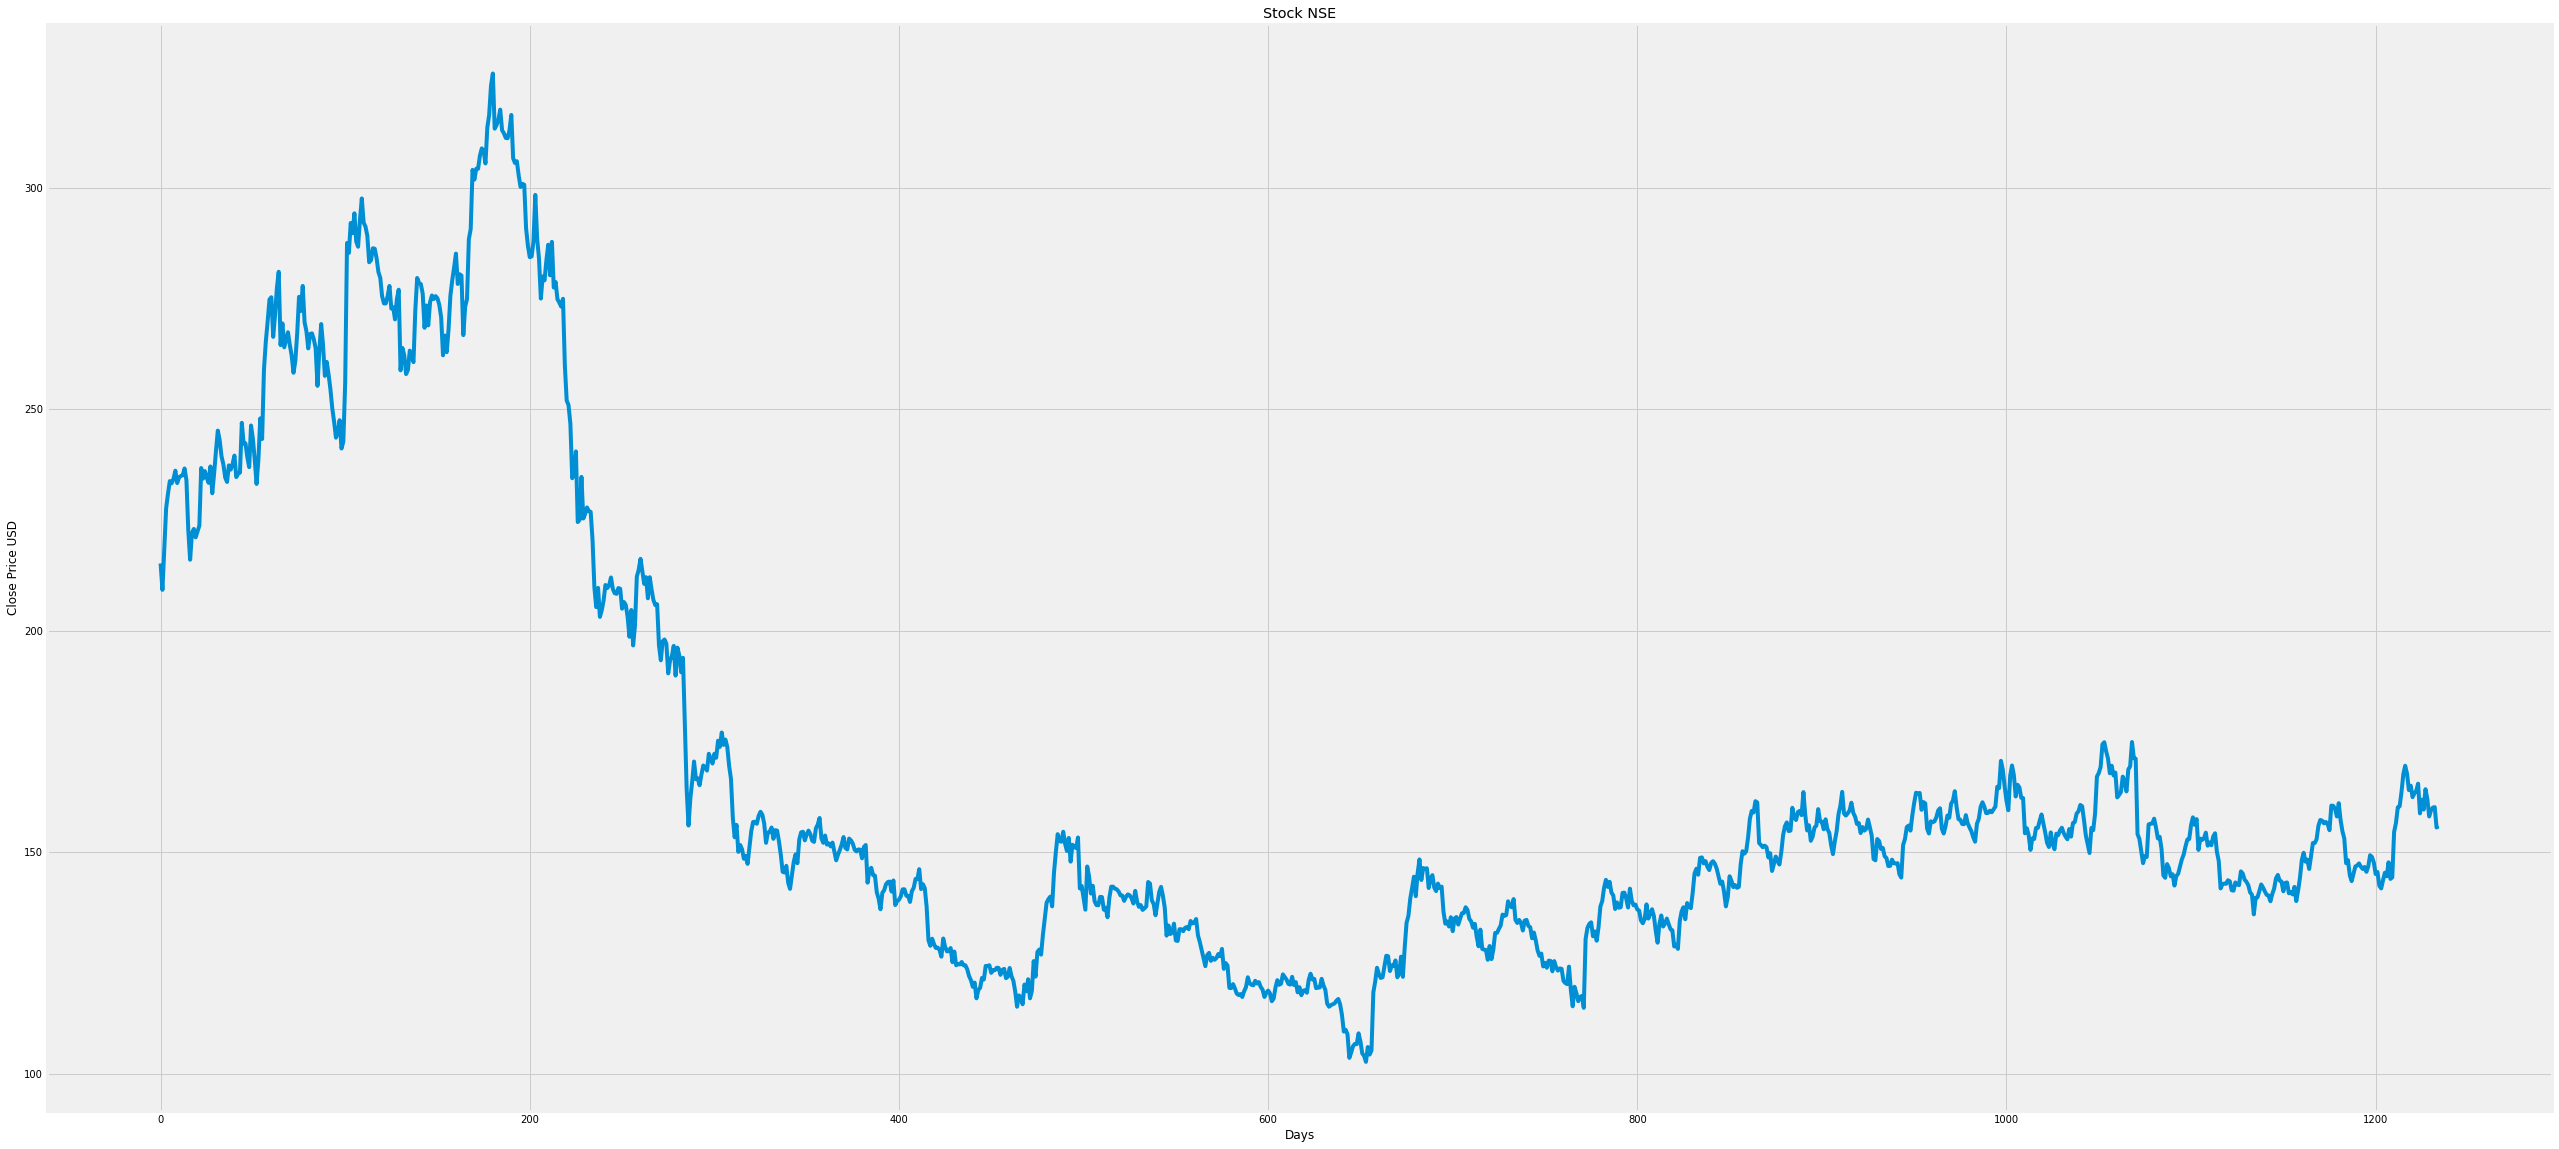

In [ ]:
#Trực quan hóa data giá đóng cổ phiếu
plt.figure(figsize=(40,20))
plt.title('Stock NSE')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Model Long-Short Term Memory
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [ ]:
#khởi tạo data training
train_data = scaled_data[0:training_data_len]
x_train1 = []
y_train1 = []

for i in range(100,len(train_data)):
  x_train1.append(train_data[i-100:i,0])
  y_train1.append(train_data[i,0])
  if i <= 101:
    print(x_train1)
    print(y_train1)
    print()

[array([0.50425818, 0.47758853, 0.51792918, 0.56006275, 0.57485433,
       0.58762887, 0.58538772, 0.58987001, 0.59816226, 0.58561183,
       0.59143882, 0.59278351, 0.59345585, 0.60040341, 0.58852532,
       0.53787539, 0.50806813, 0.5349619 , 0.53922008, 0.53070372,
       0.53675482, 0.5425818 , 0.60085164, 0.59009413, 0.59771403,
       0.5912147 , 0.58583595, 0.60242044, 0.57530255, 0.59524877,
       0.61810847, 0.63872703, 0.62909009, 0.61272972, 0.60466159,
       0.5912147 , 0.58673241, 0.60354101, 0.59928283, 0.6048857 ,
       0.61340206, 0.59166293, 0.59524877, 0.59614523, 0.64657104,
       0.62550426, 0.62572837, 0.61160914, 0.6017481 , 0.64388167,
       0.63043478, 0.609368  , 0.58471537, 0.60959211, 0.65105334,
       0.63021067, 0.70035858, 0.72859704, 0.7492156 , 0.77140296,
       0.77364411, 0.73352757, 0.75571493, 0.78283281, 0.7994173 ,
       0.72523532, 0.74719857, 0.72299417, 0.73038996, 0.73823398,
       0.72545944, 0.71470193, 0.69722098, 0.70909906, 0.7368

In [ ]:
#chuyển đổi x_train1 và y_train1 sang dạng mảng
x_train1 = np.array(x_train1)
y_train1 = np.array(y_train1)

In [ ]:
#reshape data
x_train1 = np.reshape(x_train1,(x_train1.shape[0], x_train1.shape[1],1))
x_train1.shape

(888, 100, 1)

In [ ]:
#LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, return_sequences=True, input_shape= (x_train1.shape[1], 1)))
model_LSTM.add(LSTM(50, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))

In [ ]:
#thực thi model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#training model LSTM
model_LSTM.fit(x_train1, y_train1, batch_size= 1, epochs= 1)

888/888 [==============================] - 33s 34ms/step - loss: 0.0053


In [ ]:
#tạo data test
test_data = scaled_data[training_data_len - 100: ,:]
#khởi tạo x_test và y_test
x_test1 = []
y_test1 = dataset[training_data_len: , :]
for i in range(100, len(test_data)):
  x_test1.append(test_data[i - 100:i,0])
print(x_test1)
print(y_test1)

[array([0.25392201, 0.24966383, 0.27297176, 0.24966383, 0.23419991,
       0.23935455, 0.22366652, 0.2279247 , 0.2371134 , 0.23890632,
       0.25571493, 0.24361273, 0.24294039, 0.23532048, 0.24540565,
       0.2355446 , 0.23173465, 0.21918422, 0.21021963, 0.22299417,
       0.23352757, 0.25056029, 0.25907665, 0.27319588, 0.25123263,
       0.2492156 , 0.25145675, 0.25437024, 0.26221425, 0.25190498,
       0.24809502, 0.24069924, 0.2415957 , 0.23151053, 0.23756163,
       0.2339758 , 0.23576871, 0.24518153, 0.23733752, 0.22882116,
       0.20528911, 0.20394442, 0.22545944, 0.2234424 , 0.21537427,
       0.21649485, 0.20797848, 0.20618557, 0.19811744, 0.19834155,
       0.20461676, 0.20103093, 0.2005827 , 0.20103093, 0.18982519,
       0.18646347, 0.21940834, 0.22545944, 0.23756163, 0.23913043,
       0.2339758 , 0.24943971, 0.26199014, 0.27229942, 0.27162707,
       0.2720753 , 0.25504258, 0.2628866 , 0.26154191, 0.23599283,
       0.2310623 , 0.24338861, 0.24249216, 0.24338861, 0.2474

In [ ]:
#chuyển đôi data test sang dạng mảng
x_test1 = np.array(x_test1)

In [ ]:
#reshape data
x_test1 = np.reshape(x_test1, (x_test1.shape[0],x_test1.shape[1],1))

In [ ]:
#đưa ra giá trị dự đoán
predictions_LSTM = model_LSTM.predict(x_test1)
predictions_LSTM = scaler.inverse_transform(predictions_LSTM)

In [ ]:
#get the root mean squared error(rmse)
rmse = np.sqrt(np.mean(predictions_LSTM - y_test)**2)
rmse

16.421043970937554

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


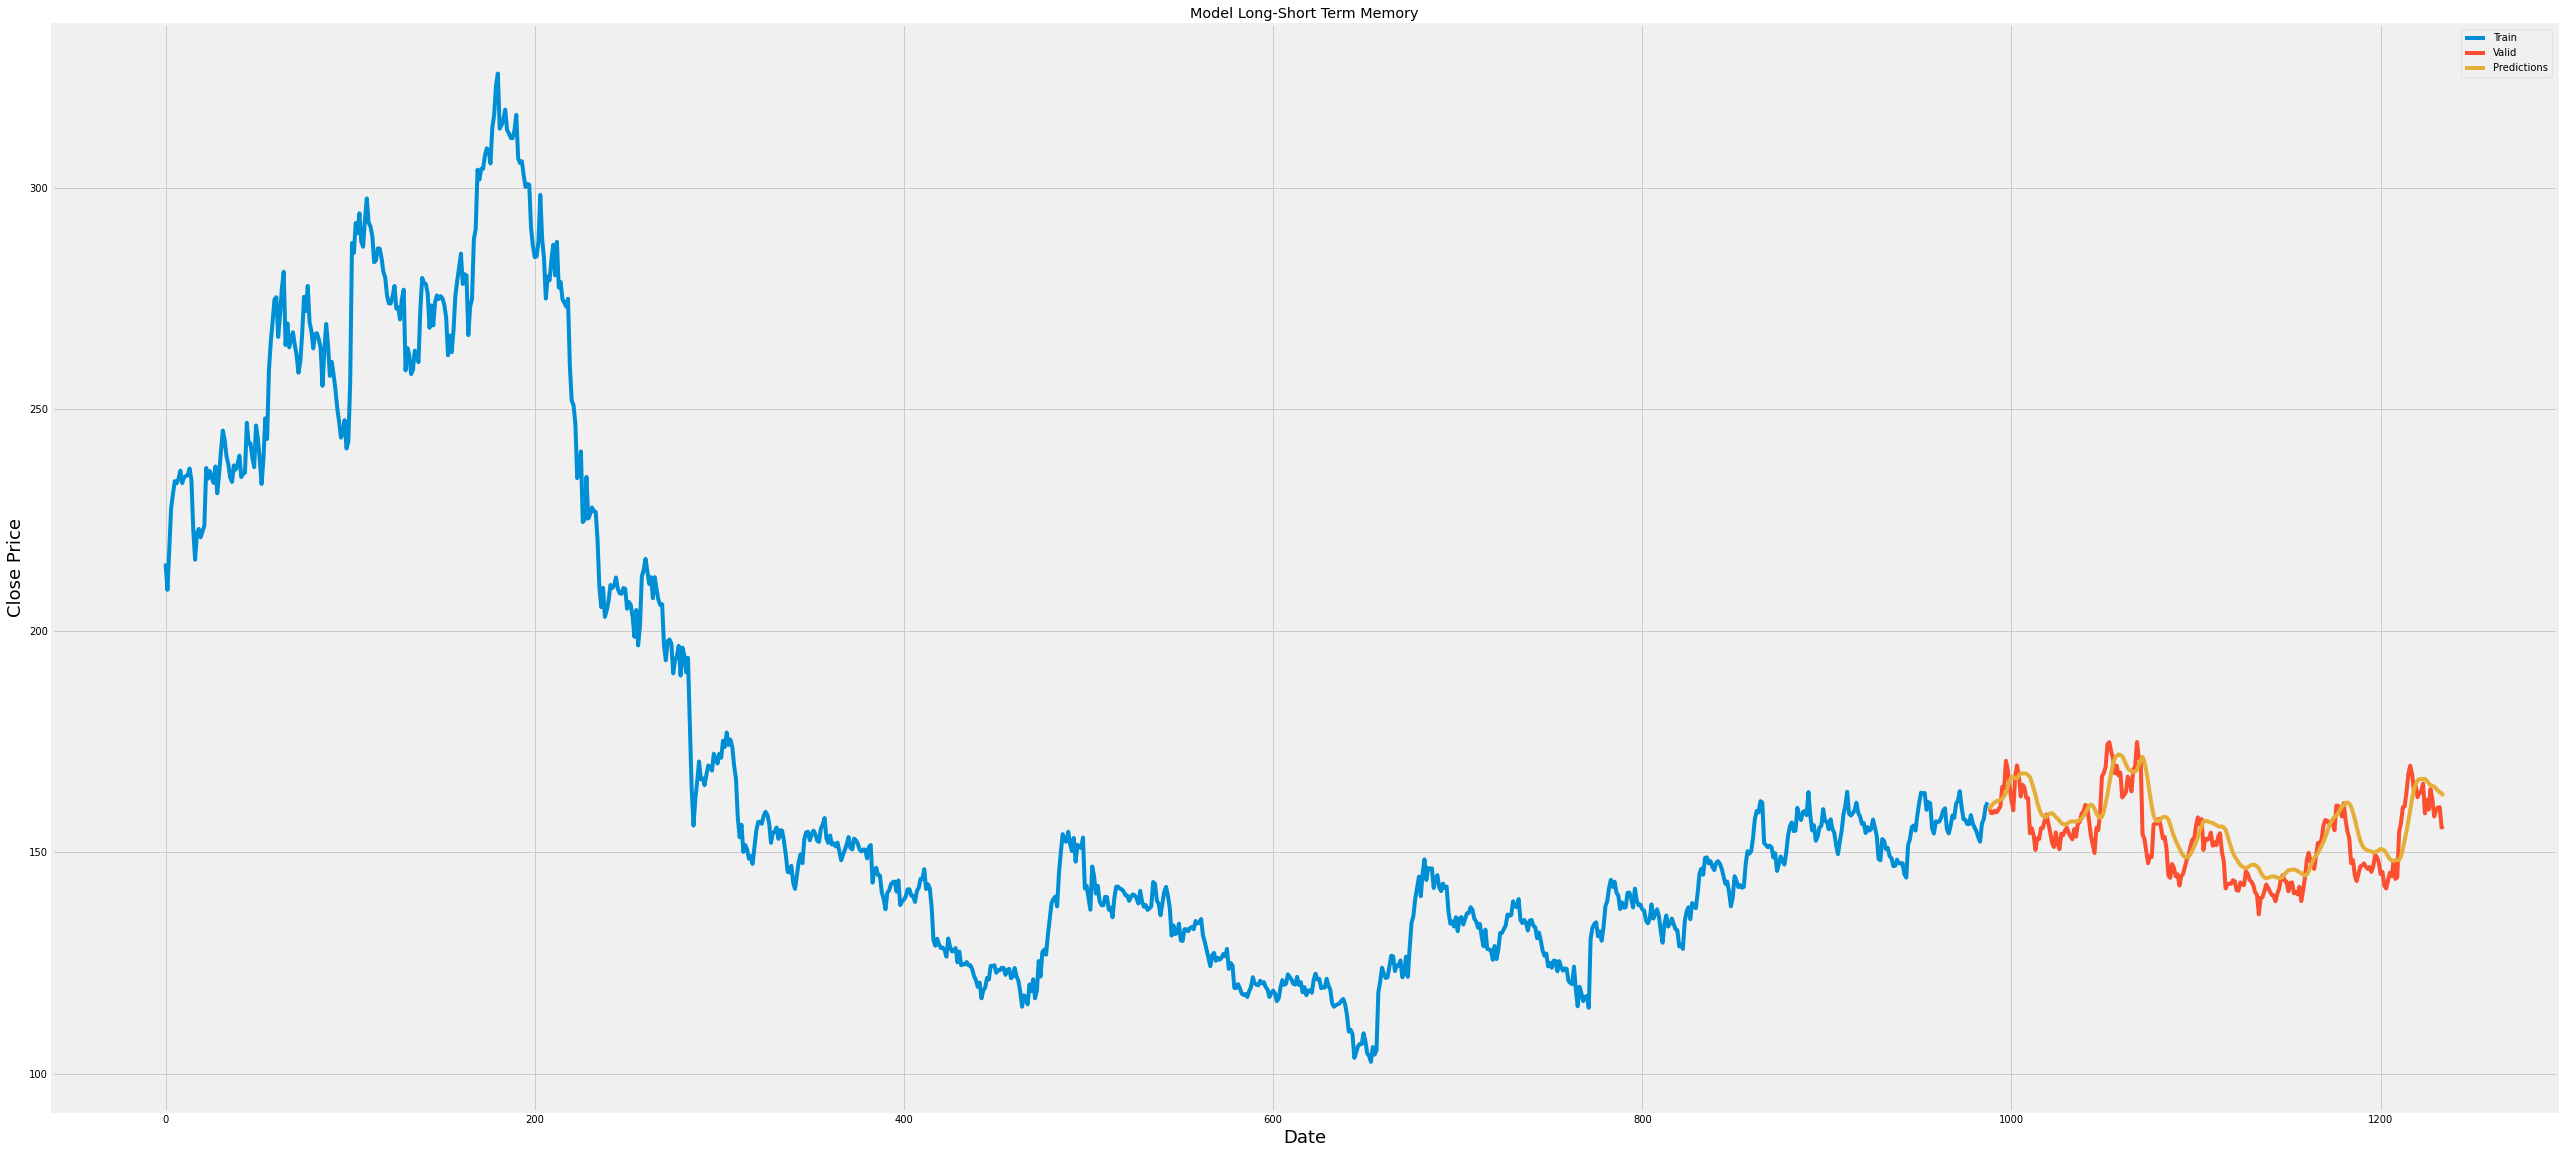

In [ ]:
#Plot the data
train_LSTM = data[: training_data_len]
valid_LSTM = data[training_data_len:]
valid_LSTM['Predictions'] = predictions_LSTM
#trực quan hóa dữ liệu
plt.figure(figsize=(40,20))
plt.title('Model Long-Short Term Memory')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train_LSTM['Close']) 
plt.plot(valid_LSTM[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'])
plt.show()

In [ ]:
#lưu dữ liệu vào dataframe
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head(6)
df.shape

(1235, 8)

In [ ]:
df = df[['Close']]
df.head(5)

In [ ]:
#Model Desition Tree và Model Linear Regression
#Dự đoán thử sao 'x' ngày thì giá sẽ như thế nào
future_days = 100
#tạo cột kết quả dự kiến sau x ngày
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,215.15,255.90
1,209.20,287.50
2,218.20,285.25
3,227.60,292.00


In [ ]:
#tạo tập dữ liệu tính năng x và chuyển đổi nó thành một mảng numpy và xóa x hàng / ngày cuối cùng
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[215.15]
 [209.2 ]
 [218.2 ]
 ...
 [140.9 ]
 [140.4 ]
 [135.95]]


In [ ]:
#taọ dataset mục tieu và chuyển đổi sang mảng
y = np.array(df['Prediction'])[:-future_days]
print(y)

[255.9  287.5  285.25 ... 160.15 155.55 155.8 ]


In [ ]:
#chia data thành 2 phần 80% để train và 20% còn lại để test
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)

In [ ]:
#khởi tạo model train
#khởi tạo model DT
tree = DecisionTreeRegressor().fit(x_train, y_train)
#khởi tạo model Linear
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#lấy những hàng cuối của dữ liệu
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[153.5 ],
       [156.55],
       [156.8 ],
       [158.7 ],
       [159.2 ],
       [160.65],
       [160.35],
       [157.2 ],
       [153.75],
       [151.8 ],
       [149.8 ],
       [155.45],
       [154.95],
       [158.7 ],
       [167.05],
       [167.85],
       [169.2 ],
       [174.35],
       [174.8 ],
       [172.75],
       [171.1 ],
       [167.8 ],
       [169.5 ],
       [167.3 ],
       [167.95],
       [162.35],
       [162.9 ],
       [163.55],
       [167.05],
       [166.  ],
       [163.7 ],
       [168.65],
       [169.35],
       [174.85],
       [171.2 ],
       [171.1 ],
       [154.05],
       [153.  ],
       [150.3 ],
       [147.5 ],
       [149.1 ],
       [148.9 ],
       [156.25],
       [156.4 ],
       [156.45],
       [157.55],
       [155.55],
       [153.1 ],
       [153.45],
       [150.7 ],
       [144.75],
       [144.2 ],
       [147.3 ],
       [146.4 ],
       [144.55],
       [145.  ],
       [142.45],
       [144.6 ],
       [145.1 

In [ ]:
#Show model cây quyết định
tree_dict = tree.predict(x_future)
print(tree_dict)
print()
#Show model linear
lr_dict = lr.predict(x_future)
print(lr_dict)
print()

[151.3625     139.8        128.45       148.75       142.
 154.25       140.35       142.9        131.375      140.55
 163.75       142.86666667 134.75       148.75       145.825
 144.25       143.05       143.15       140.7        139.25
 157.25       144.25       140.45       141.35       144.25
 148.2        149.85       155.4        145.825      143.55
 149.05       152.05       152.05       152.9        155.95
 157.25       120.325      156.5        156.8        149.375
 128.85       160.5        123.4        145.63333333 142.85
 159.         148.71666667 142.1        121.3        150.5
 148.2        144.75       150.45       143.65       144.1
 157.2        147.45       144.1        146.2        146.65
 153.8        115.65       133.9        148.9        148.48333333
 145.05       155.51666667 145.05       144.65       143.65
 135.375      144.55       142.1        134.275      162.55
 154.55       162.55       151.3625     156.275      153.15
 167.6        143.4        151.5    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


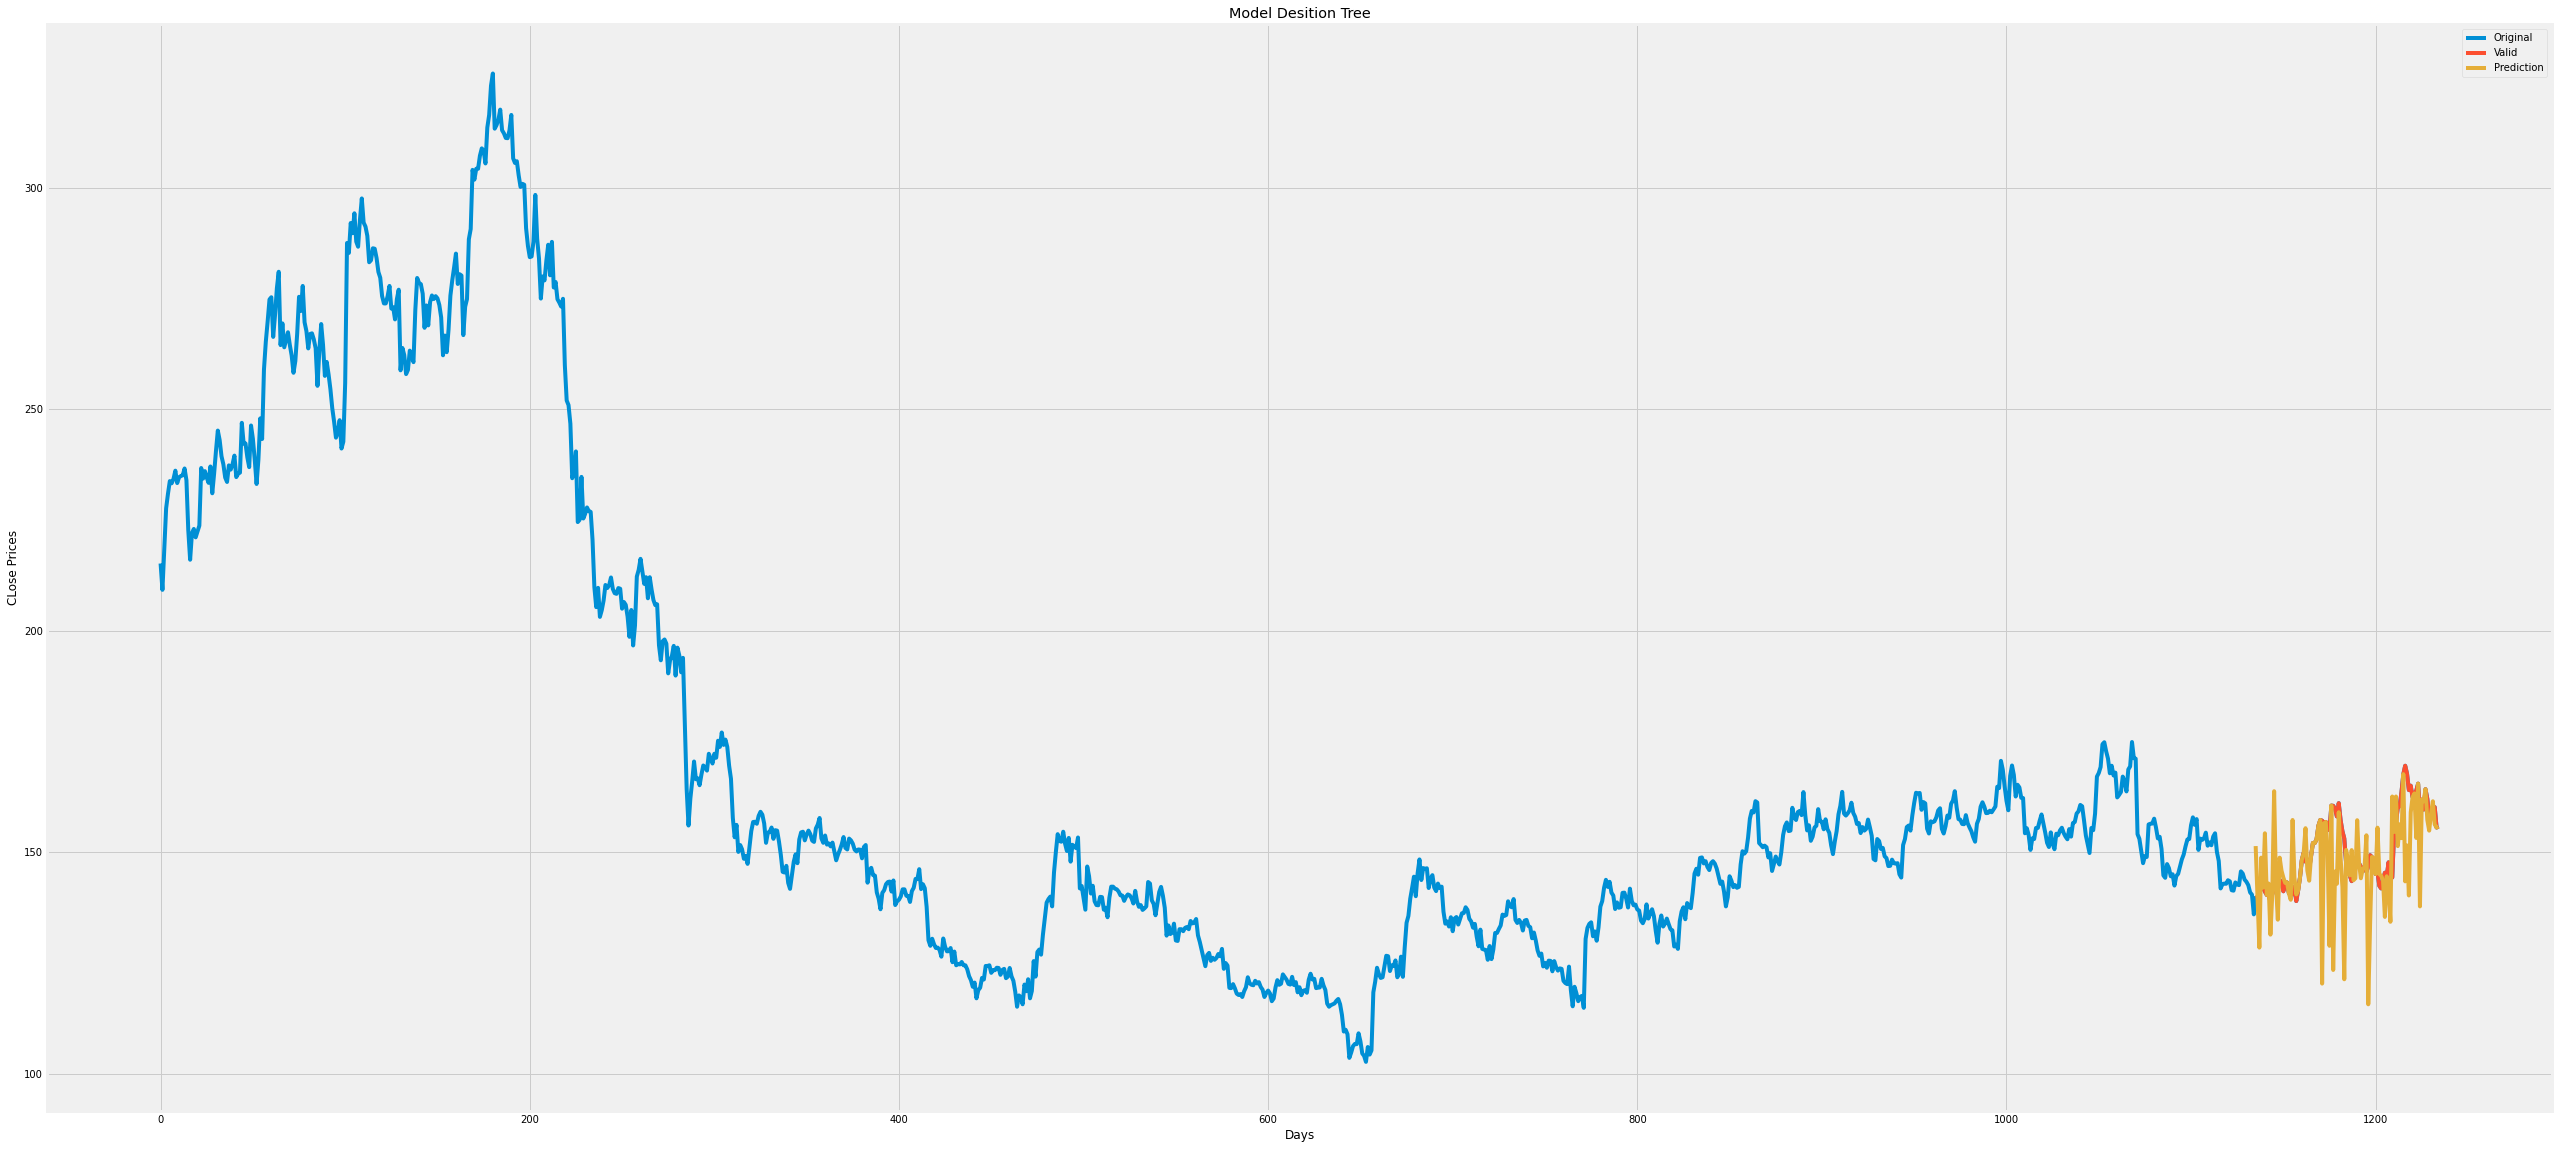

In [ ]:
#Trực quan hóa dữ liệu theo model cây quyết định
predictions_DT = tree_dict
valid_DT = df[X.shape[0]:]
valid_DT['Prediction'] = predictions_DT
plt.figure(figsize=(40,20))
plt.title('Model Desition Tree')
plt.xlabel('Days')
plt.ylabel('CLose Prices')
plt.plot(df['Close'])
plt.plot(valid_DT[['Close' , 'Prediction']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


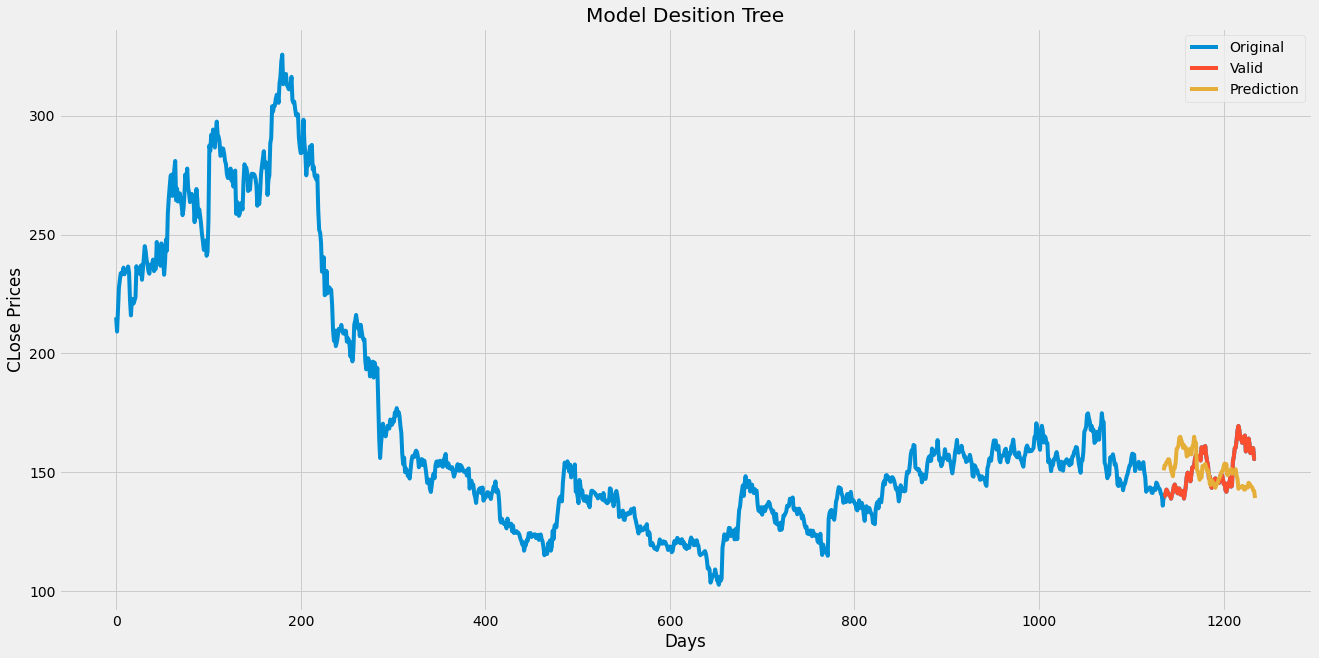

In [ ]:
#Trực quan hóa dữ liệu theo model linear
predictions_LR = lr_dict
valid_LR = df[X.shape[0]:]
valid_LR['Prediction'] = predictions_LR
plt.figure(figsize=(20,10))
plt.title('Model Desition Tree')
plt.xlabel('Days')
plt.ylabel('CLose Prices')
plt.plot(df['Close'])
plt.plot(valid_LR[['Close' , 'Prediction']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold

knn_regressor=KNeighborsRegressor(n_neighbors = 20)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test, cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100, "%")

Accuracy:  65.71174479382711 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
K = range(1, 10)
for k in K:
  kmeanModel = KMeans(n_clusters = k)
  kmeanModel.fit(data)
  distortions.append(kmeanModel.inertia_)

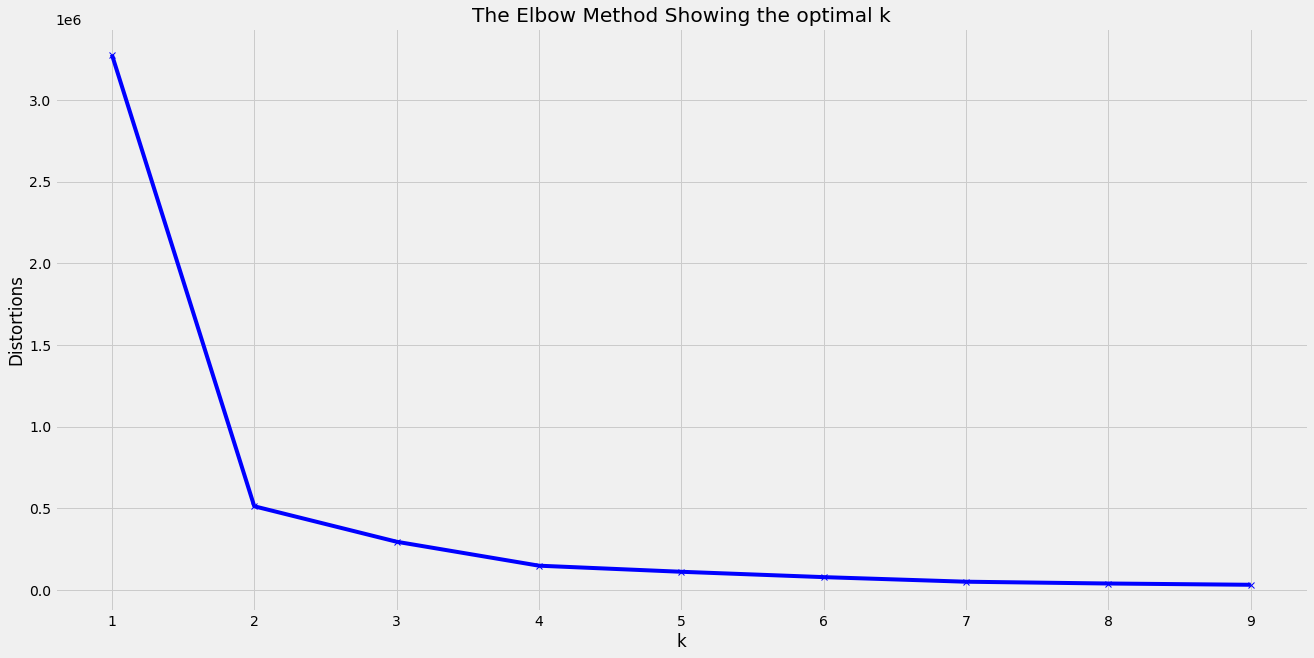

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method Showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(data)
for i in range(len(kmeans.labels_)):
  x = kmeans.labels_[i]
  print(x)
print(kmeans.cluster_centers_)

In [ ]:
y_km = kmeans.fit_predict(data.values)

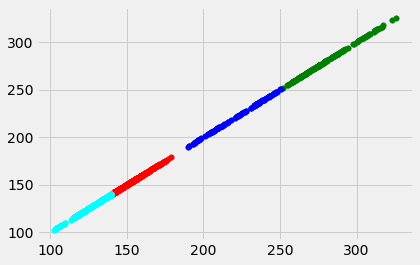

In [ ]:
#y_km
plt.scatter(data[y_km == 0], data[y_km == 0], s = 30, color='red')
plt.scatter(data[y_km == 1], data[y_km == 1], s = 30, color='green')
plt.scatter(data[y_km == 2], data[y_km == 2], s = 30, color='blue')
plt.scatter(data[y_km == 3], data[y_km == 3], s = 30, color='cyan')